### Zadanie:

A. Wybrać trzy metody poszukiwania pierwiastków: 

* wykorzystującą przedział i zmianę znaku, 
* wykorzystującą pochodną, 
* wykorzystującą przybliżenie pochodnej

    1. Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b>Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b> (3 pkt)

    2. Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. (1 pkt)

    3. Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny)(1 pkt)

In [85]:
using Pkg
Pkg.add("Plots")
Pkg.add("Roots")
Pkg.add("ForwardDiff")
using Roots  
using Plots
using ForwardDiff

  Resolving package versions...
No Changes to `/opt/julia/environments/v1.5/Project.toml`
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `/opt/julia/environments/v1.5/Project.toml`
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `/opt/julia/environments/v1.5/Project.toml`
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`


In [86]:
f1(x) = cos(x)-x
f2(x) = 2*x - exp(-x)
f3(x) = (x+3) * (x-1)^2
f4(x) = (x-1)^7
f5(x) = x^3
f6(x) = x^3 - 2*x - 5

f6 (generic function with 1 method)

In [87]:
function is_zero(g, x)
    return g(prevfloat(x)) * g(x) < 0.0 || g(x) * g(nextfloat(x)) <= 0.0
end

is_zero (generic function with 1 method)

In [88]:
f(x) = cos(x) - x
x = find_zero(f2, (0, 1),verbose=true)  
is_zero(f,x)

Results of univariate zero finding:

* Converged to: 0.3517337112491959
* Algorithm: Roots.BisectionExact()
* iterations: 61
* function evaluations: 63
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  1.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  1.0000000000000000)
(a_3, b_3) = ( 0.0000000000000000,  1.0000000000000000)
(a_4, b_4) = ( 0.0000000000000000,  1.0000000000000000)
(a_5, b_5) = ( 0.0000000002401066,  1.0000000000000000)
(a_6, b_6) = ( 0.0000154972076416,  1.0000000000000000)
(a_7, b_7) = ( 0.0039367675781250,  1.0000000000000000)
(a_8, b_8) = ( 0.0627441406250000,  1.0000000000000000)
(a_9, b_9) = ( 0.2504882812500000,  1.0000000000000000)
(a_10, b_10) = ( 0.2504882812500000,  0.5004882812500000)
(a_11, b_11) = ( 0.2504882812500000,  0.3753662109375000)
(a_12, b_12) = ( 0.3129272460937500,  

false

In [89]:
function get_data(f, range, method)
    orginal_stdout = stdout
    (rd, wr) = redirect_stdout()
    x = find_zero(f, range, method, verbose=true)
    redirect_stdout(orginal_stdout)
    out = String(readavailable(rd))
    
    iter = match(r"(?<=iterations: )(\d+)", out).match
    eval = match(r"(?<=function evaluations: )(\d+)", out).match
    
    return x, parse(Int64, iter), parse(Int64, eval)
end

get_data (generic function with 1 method)

In [90]:
x, iters, evals = get_data(f3, (-5,5), Bisection())

(-3.0, 60, 62)

In [91]:
function insert_row(arr, row, args)
    for col = 1:size(arr, 2)
        arr[row, col] = args[col]
    end
    return arr, row + 1
end

insert_row (generic function with 1 method)

In [92]:
funcs = [f1 f2 f3 f4 f5 f6]
res = Array{Any}(undef, 3 * 6 + 6, 6)
row = 1
for f in funcs
    # Bisection
    x, iter, eval = get_data(f, (-5,5), Bisection())
    res, row = insert_row(res, row, [f, "Bisc", iter, eval, round(x,digits = 5), is_zero(f, x)])

    # Newton
    D(f) = x->ForwardDiff.derivative(f, float(x))
    x, iter, eval = get_data((f, D(f)), 0, Roots.Newton())
    res, row = insert_row(res, row, [f, "Newt", iter, eval, round(x,digits = 5), is_zero(f, x)])

    # Steffensena
    x, iter, eval = get_data(f, 0, Order2())
    res, row = insert_row(res, row, [f, "Stef", iter, eval, round(x,digits = 5), is_zero(f, x)])
    
    res, row = insert_row(res, row, ["---", "---","---","---","---","---"])
end

### 1.

In [93]:
using Pkg
Pkg.add("PrettyTables")
using PrettyTables
# printing table
header = ["Function", "Method", "Iterations", "Evaluations", "Root", "Is Zero"]
pretty_table(res, header)

  Resolving package versions...


┌──────────┬────────┬────────────┬─────────────┬─────────┬─────────┐
│ Function │ Method │ Iterations │ Evaluations │    Root │ Is Zero │
├──────────┼────────┼────────────┼─────────────┼─────────┼─────────┤
│       f1 │   Bisc │         61 │          63 │ 0.73909 │    true │
│       f1 │   Newt │          5 │          11 │ 0.73909 │    true │
│       f1 │   Stef │          6 │          10 │ 0.73909 │    true │
│      --- │    --- │        --- │         --- │     --- │     --- │
│       f2 │   Bisc │         60 │          62 │ 0.35173 │    true │
│       f2 │   Newt │          4 │           9 │ 0.35173 │    true │
│       f2 │   Stef │          5 │           9 │ 0.35173 │    true │
│      --- │    --- │        --- │         --- │     --- │     --- │
│       f3 │   Bisc │         60 │          62 │    -3.0 │    true │
│       f3 │   Newt │         26 │          53 │     1.0 │   false │
│       f3 │   Stef │         28 │          50 │     1.0 │   false │
│      --- │    --- │        --- │

No Changes to `/opt/julia/environments/v1.5/Project.toml`
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`


### 2. Ciekawy przykład funkcji

Wybrałem funkcje f3, dlatego że ma dwa miejsca zerowe, różne metody różnie znajdują te miejsca zerowe, dodatkowo miejsce zerowe 1 jest znajdowane niedokładnie.

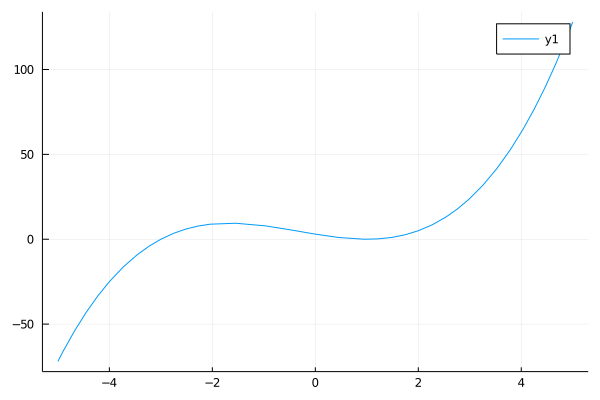

In [94]:
#f3(x) = (x+3) * (x-1)^2
plot(f3)

In [95]:
# Bisection
find_zero(f3, (-5,5), Bisection(), verbose=true)

Results of univariate zero finding:

* Converged to: -2.999999999999999
* Algorithm: Roots.BisectionExact()
* iterations: 60
* function evaluations: 62
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = (-5.0000000000000000,  0.0000000000000000)
(a_1, b_1) = (-5.0000000000000000, -0.0000000000000000)
(a_2, b_2) = (-5.0000000000000000, -0.0000000000000000)
(a_3, b_3) = (-5.0000000000000000, -0.0000000000000000)
(a_4, b_4) = (-5.0000000000000000, -0.0000000000000000)
(a_5, b_5) = (-5.0000000000000000, -0.0000000011277734)
(a_6, b_6) = (-5.0000000000000000, -0.0000751018524170)
(a_7, b_7) = (-5.0000000000000000, -0.0193786621093750)
(a_8, b_8) = (-5.0000000000000000, -0.3112792968750000)
(a_9, b_9) = (-5.0000000000000000, -1.2475585937500000)
(a_10, b_10) = (-5.0000000000000000, -2.4975585937500000)
(a_11, b_11) = (-3.4987792968750000, -2.4975585937500000)
(a_12, b_12) = (-3.4987792968750000, -

-3.0

In [96]:
# Newton
D(f3) = x->ForwardDiff.derivative(f3, float(x))
find_zero((f3, D(f3)), 0, Roots.Newton(), verbose=true)

Results of univariate zero finding:

* Converged to: 0.9999999893171166
* Algorithm: Roots.Newton()
* iterations: 26
* function evaluations: 53
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  3.0000000000000000
x_1 =  0.6000000000000000,	 fx_1 =  0.5760000000000002
x_2 =  0.8117647058823529,	 fx_2 =  0.1350604518624058
x_3 =  0.9082650781831720,	 fx_3 =  0.0328892070132730
x_4 =  0.9546772328747365,	 fx_4 =  0.0081235129715387
x_5 =  0.9774692207697649,	 fx_5 =  0.0020191066159544
x_6 =  0.9887666079847495,	 fx_6 =  0.0005033388530879
x_7 =  0.9943912241748282,	 fx_7 =  0.0001256570221040
x_8 =  0.9971975823794025,	 fx_8 =  0.0000313921691694
x_9 =  0.9985992825526103,	 fx_9 =  0.0000078452892489
x_10 =  0.9992997639663359,	 fx_10 =  0.0000019609786643
x_11 =  0.9996499126368736,	 fx_11 =  0.0000004902017402
x_12 =  0.9998249639795151,	 fx_12 =  0.0000001225450712
x_13 =  0.9999124839047338,	 fx_13 =  0.0000000306355974


0.9999999893171166

In [97]:
# Steffensen
find_zero(f3, 0, Order2(), verbose=true)

Results of univariate zero finding:

* Converged to: 0.9999999882918915
* Algorithm: Order2()
* iterations: 28
* function evaluations: 50
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  3.0000000000000000
x_1 =  0.6000007266572467,	 fx_1 =  0.5759980234937676
x_2 =  0.7425745512658876,	 fx_2 =  0.2480124126004012
x_3 =  0.8503843973092605,	 fx_3 =  0.0861901946566459
x_4 =  0.9078063739355543,	 fx_4 =  0.0332150438398251
x_5 =  0.9438095460191374,	 fx_5 =  0.0124520545825248
x_6 =  0.9654014978509854,	 fx_6 =  0.0047468090470905
x_7 =  0.9787031988582305,	 fx_7 =  0.0018045557117044
x_8 =  0.9868614564220237,	 fx_8 =  0.0006882173165696
x_9 =  0.9936176755396728,	 fx_9 =  0.0001626762840448
x_10 =  0.9968525182799099,	 fx_10 =  0.0000395953837412
x_11 =  0.9984368327132128,	 fx_11 =  0.0000097701482792
x_12 =  0.9992210184017803,	 fx_12 =  0.0000024267766258
x_13 =  0.9996111546600934,	 fx_13 =  0.0000006047439998
x_14 =

0.9999999882918915

### 3. Przykłady dla których błąd

 ## Metoda Bisekcji

Metoda bisekcji często nie moze znaleźć pierwiastka, gdy pierwiastek jest pierwiastkiem podwójnym, funkcja zachowuję ten sam znak pomimo osiągnięcia zera.

In [98]:
f(x) = (x - 1)^2
find_zero(f, (-5,5), Bisection(), verbose=true)

LoadError: [91mArgumentError: The interval [a,b] is not a bracketing interval.[39m
[91mYou need f(a) and f(b) to have different signs (f(a) * f(b) < 0).[39m
[91mConsider a different bracket or try fzero(f, c) with an initial guess c.[39m



## Metoda Newtona

Dla funkcji f(x) = cos(100*x)-4*erf(30*x-10) obie metody zawodzą.
Metoda Newtona zwraca błędne miejsce zerowe, Wartość dla tego argumentu to -4.15.
Metoda Steffersona nie może znaleźć miejsca zerowego i zwraca error "To many steps taken".
Ale metoda Bisekcji poprawnie policzy miejsce zerowe.

1 przyklad

In [99]:
Pkg.add("SpecialFunctions")
using SpecialFunctions
f(x) = cos(100*x)-4*erf(30*x-10)
D(f) = x->ForwardDiff.derivative(f, float(x))
x = find_zero((f, D(f)), 0, Roots.Newton(), verbose=true)

  Resolving package versions...


Results of univariate zero finding:

* Converged to: 9.926174124369038e41
* Algorithm: Roots.Newton()
* iterations: 1
* function evaluations: 3
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  5.0000000000000000
x_1 =  992617412436903833480015075729737592602624.0000000000000000,	 fx_1 = -3.3152873109355183



No Changes to `/opt/julia/environments/v1.5/Project.toml`
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`


9.926174124369038e41

In [100]:
iszero(f(x)), f(x)

(false, -3.3152873109355183)

2 przyklad f(x) = x*(1-x) zwraca błąd gdy naszym punktem starowym jest 1/2, gdzie pochodna jest równa 0

In [101]:
f(x) = x * (1-x)

f (generic function with 1 method)

In [102]:
D(f) = x->ForwardDiff.derivative(f, float(x))
x = find_zero((f, D(f)), 1/2, Roots.Newton(), verbose=true)

Results of univariate zero finding:

* Convergence failed: Too many steps taken. 
* Algorithm Roots.Newton()

Trace:
x_0 =  0.5000000000000000,	 fx_0 =  0.2500000000000000
x_1 =  0.5000000000000000,	 fx_1 =  0.2500000000000000
x_2 =  0.5000000000000000,	 fx_2 =  0.2500000000000000
x_3 =  0.5000000000000000,	 fx_3 =  0.2500000000000000
x_4 =  0.5000000000000000,	 fx_4 =  0.2500000000000000
x_5 =  0.5000000000000000,	 fx_5 =  0.2500000000000000
x_6 =  0.5000000000000000,	 fx_6 =  0.2500000000000000
x_7 =  0.5000000000000000,	 fx_7 =  0.2500000000000000
x_8 =  0.5000000000000000,	 fx_8 =  0.2500000000000000
x_9 =  0.5000000000000000,	 fx_9 =  0.2500000000000000
x_10 =  0.5000000000000000,	 fx_10 =  0.2500000000000000
x_11 =  0.5000000000000000,	 fx_11 =  0.2500000000000000
x_12 =  0.5000000000000000,	 fx_12 =  0.2500000000000000
x_13 =  0.5000000000000000,	 fx_13 =  0.2500000000000000
x_14 =  0.5000000000000000,	 fx_14 =  0.2500000000000000
x_15 =  0.5000000000000000,	 fx_15 =  0.25000000

LoadError: [91mRoots.ConvergenceFailed("Stopped at: xn = 0.5. Too many steps taken. ")[39m

## Metoda Steffersona

In [103]:
Pkg.add("SpecialFunctions")
using SpecialFunctions
f(x) = cos(100*x)-4*erf(30*x-10)
plot(f, -1, 1)
find_zero(f, (-5,5), Order2(), verbose=true)

  Resolving package versions...


Results of univariate zero finding:

* Convergence failed: Too many steps taken. 
* Algorithm Order2()

Trace:
x_0 =  5.0000000000000000,	 fx_0 = -4.8838492734314780
x_1 = -1.1048115917893480,	 fx_1 =  3.1348847899788566
x_2 =  1.2818345862044609,	 fx_2 = -4.8128078718833347
x_3 = -0.1634238053244246,	 fx_3 =  3.1945827746402129
x_4 =  0.4131682165081675,	 fx_4 = -4.8859558983249674
x_5 =  0.0645276983425277,	 fx_5 =  4.9856549725285584
x_6 =  0.2406085179531943,	 fx_6 =  4.4781317591542118
x_7 =  1.7942578677708676,	 fx_7 = -4.9376445692481941
x_8 =  0.9795222573355632,	 fx_8 = -4.8457359386809040
x_9 = -41.9761131780003254,	 fx_9 =  4.9032413455382491
x_10 = -20.3716062076800419,	 fx_10 =  4.1615046062945931
x_11 =  100.8402072524288968,	 fx_11 = -3.1184650714278130
x_12 =  48.9176274542624938,	 fx_12 = -4.9544504684306876
x_13 =  189.0319498356362828,	 fx_13 = -4.9732115016734193
x_14 = -36952.7475353738482227,	 fx_14 =  4.0432891758543432
x_15 = -36974.9653980721850530,	 fx_15 =  4

No Changes to `/opt/julia/environments/v1.5/Project.toml`
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`


LoadError: [91mRoots.ConvergenceFailed("Stopped at: xn = -36935.09346133069. Too many steps taken. ")[39m